In [0]:
import pandas as pd 
import numpy as np

In [0]:
df = pd.read_csv("/content/drive/My Drive/flower_recog/data_1_1.csv")

In [3]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151,Labels
0,0,26,30,32,18,22,24,10,14,16,9,12,17,11,14,19,12,16,21,18,19,24,26,25,30,37,37,37,49,49,49,57,57,57,62,61,61,63,65,66,...,23,35,35,22,34,34,29,34,35,29,34,35,28,33,34,22,33,33,22,34,34,20,32,32,17,29,29,15,27,27,22,27,30,30,32,32,45,40,39,55
1,1,49,50,54,58,61,61,61,64,63,63,67,67,77,73,79,70,72,81,64,67,82,66,74,86,73,84,92,85,90,90,62,64,69,58,56,66,67,66,75,...,22,31,40,30,40,46,37,40,55,38,42,55,43,55,60,47,57,61,37,41,43,33,43,45,33,38,42,26,32,39,43,47,58,60,67,76,62,74,79,40
2,2,7,105,31,13,103,30,48,132,60,56,139,67,43,126,54,24,105,33,19,103,31,17,111,37,107,189,114,0,100,18,11,97,28,27,114,41,21,110,36,...,9,9,9,19,19,19,2,2,2,2,2,2,2,2,2,0,0,0,3,1,1,4,2,2,2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,18
3,3,141,135,136,151,145,146,160,154,155,170,164,165,179,173,174,188,182,183,194,188,189,199,193,194,205,200,202,212,207,209,214,209,211,218,213,215,221,216,218,...,61,94,57,56,88,53,49,80,47,43,74,43,36,66,37,32,59,33,32,56,32,34,55,33,36,59,31,42,66,37,47,71,39,47,72,38,48,71,39,73
4,4,3,14,12,4,10,9,3,8,7,3,9,8,7,13,12,9,17,17,11,22,19,12,29,19,12,31,18,10,29,29,9,25,40,6,24,45,2,23,55,...,15,22,25,13,16,20,13,18,19,13,17,22,17,19,27,17,22,27,16,25,29,16,26,30,17,23,28,15,18,23,15,19,24,13,17,22,14,18,23,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184,8184,169,171,163,198,206,218,186,204,202,134,166,133,140,171,134,146,173,133,141,171,134,130,161,122,99,142,99,80,126,81,117,172,131,117,166,128,123,165,124,...,18,39,24,21,47,34,48,75,72,38,52,50,22,38,25,26,47,32,37,50,32,16,34,17,16,34,17,14,32,15,15,24,14,29,44,30,16,34,17,28
8185,8185,7,11,8,13,16,14,16,19,17,19,22,20,21,24,23,18,22,19,16,19,17,15,18,16,16,18,19,16,18,19,16,18,19,18,19,20,18,22,19,...,89,92,96,88,93,96,96,103,106,119,128,130,128,139,137,133,141,140,134,139,138,137,142,141,123,124,128,96,97,101,70,71,75,43,44,48,39,44,47,22
8186,8186,35,72,53,44,81,61,45,82,62,41,80,59,43,82,61,44,83,62,47,81,70,50,81,70,57,84,74,61,88,78,70,100,89,78,110,99,73,107,96,...,76,94,92,87,107,103,96,113,110,103,120,117,116,133,130,119,136,133,112,131,128,102,124,120,96,117,114,87,108,104,78,99,96,69,89,84,65,85,80,16
8187,8187,96,158,114,95,162,117,91,163,117,97,162,120,101,166,124,102,167,125,104,165,121,128,177,138,125,176,139,109,169,129,105,174,133,107,175,134,110,178,137,...,44,146,95,52,146,96,47,145,97,30,130,82,21,118,71,16,114,64,9,104,54,12,105,55,7,103,53,10,100,51,8,91,44,5,87,42,9,82,35,88


In [0]:
df.set_index('Unnamed: 0',drop = True,inplace=True)

In [0]:
X = df.iloc[:,:-1].values

In [0]:
Y = df['Labels'].values

In [0]:
X = X.reshape(len(df),128,128,3)

In [0]:
from sklearn.utils import shuffle
X, Y= shuffle(X, Y)

y = 40


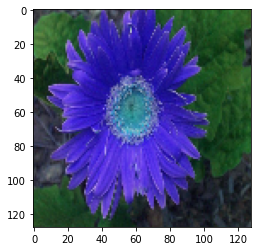

In [8]:
import matplotlib.pyplot as plt
index = 1
plt.imshow(X[index])
print("y = " + str((Y[index])))

In [0]:
from sklearn.preprocessing import OneHotEncoder
Y_trans =(OneHotEncoder().fit_transform(Y.reshape(-1,1))).toarray()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_og,X_test_og,Y_train,Y_test = train_test_split(X,Y_trans,test_size = 0.2,random_state = 10)

In [12]:
from sklearn.preprocessing import OneHotEncoder
X_train = X_train_og/255.
X_test = X_test_og/255.
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 6551
number of test examples = 1638
X_train shape: (6551, 128, 128, 3)
Y_train shape: (6551, 102)
X_test shape: (1638, 128, 128, 3)
Y_test shape: (1638, 102)


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=2,strides = 2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 2))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(102, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)      

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [18]:
 model.fit(X_train, Y_train, batch_size=200, epochs=70,
          validation_data=(X_test, Y_test), 
          verbose=2, shuffle=True)

Train on 6551 samples, validate on 1638 samples
Epoch 1/70
 - 74s - loss: 4.6020 - acc: 0.0305 - val_loss: 4.4836 - val_acc: 0.0525
Epoch 2/70
 - 74s - loss: 4.2615 - acc: 0.0557 - val_loss: 4.0881 - val_acc: 0.0653
Epoch 3/70
 - 74s - loss: 3.8850 - acc: 0.1009 - val_loss: 3.5973 - val_acc: 0.1447
Epoch 4/70
 - 74s - loss: 3.5294 - acc: 0.1601 - val_loss: 3.1679 - val_acc: 0.2314
Epoch 5/70
 - 75s - loss: 3.1395 - acc: 0.2320 - val_loss: 3.1375 - val_acc: 0.2210
Epoch 6/70
 - 78s - loss: 2.7532 - acc: 0.3051 - val_loss: 2.8046 - val_acc: 0.3046
Epoch 7/70
 - 78s - loss: 2.4485 - acc: 0.3691 - val_loss: 3.0811 - val_acc: 0.2607
Epoch 8/70
 - 73s - loss: 2.1047 - acc: 0.4437 - val_loss: 2.5175 - val_acc: 0.3755
Epoch 9/70
 - 74s - loss: 1.7933 - acc: 0.5227 - val_loss: 2.3655 - val_acc: 0.3974
Epoch 10/70
 - 74s - loss: 1.4598 - acc: 0.5996 - val_loss: 2.3176 - val_acc: 0.4164
Epoch 11/70
 - 74s - loss: 1.1669 - acc: 0.6733 - val_loss: 2.2150 - val_acc: 0.4512
Epoch 12/70
 - 74s - loss:

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 1.1969532100108813


# New Section